In [2]:
import random
random.seed(42)
#from tensorflow import set_random_seed
#set_random_seed(2)
from keras import applications

import numpy as np
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
#import keras
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
model = applications.ResNet101('None')
TRAIN_DIR = r'C:\Users\hagos\experimento1\train'
TEST_DIR = r'C:\Users\hagos\experimento1\test'
IMG_SIZE = 224

In [4]:
def load_data(name, classes, img_size = 224):
    train_data = []
    
    for cl in classes:        
        tr_dir = name + '\\' + cl
    
        for img in os.listdir(tr_dir):
            path = os.path.join(tr_dir, img)
            if "DS_Store" not in path:
                img = Image.open(path)
                img = img.convert('L')
                img = img.resize((img_size, img_size), Image.ANTIALIAS)
                train_data.append([np.array(img), cl])
            
    shuffle(train_data)
    return train_data

In [5]:
classes = ['airplane', 'pistol']

In [6]:
train_data = load_data(r'C:\Users\hagos\experimento1\train', classes)

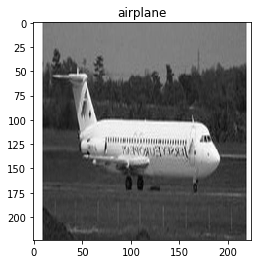

In [7]:
plt.title(train_data[4][1])
plt.imshow(train_data[4][0], cmap = 'gist_gray')

In [8]:
test_data = load_data(r'C:\Users\hagos\experimento1\test', classes)

D:\hagos\Anaconda\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


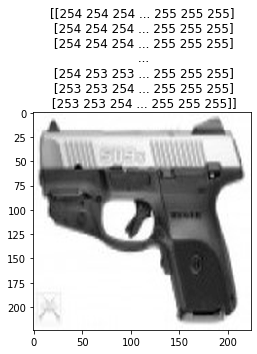

In [9]:
plt.title(test_data[0][0])
plt.imshow(test_data[0][0], cmap = 'gist_gray')

In [10]:
trainLabels

NameError: name 'trainLabels' is not defined

In [11]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(trainLabels)

LabelEncoder()

In [13]:
trainLabels = le.transform(trainLabels)
print(trainLabels)

[1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0
 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0
 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1
 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 1 1 1 0 0 

# ResNet 101

In [15]:
# Tamanhos para o qual as imagens devem ser redimensionadas ao entrar na rede
shape = [IMG_SIZE, IMG_SIZE, 1]
trained_model = tf.keras.applications.ResNet101(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=shape,
    pooling=None,
    
)
model = tf.keras.Sequential()
model.add(trained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42651904  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 100353    
Total params: 42,752,257
Trainable params: 42,646,913
Non-trainable params: 105,344
_________________________________________________________________


# Xception

In [16]:
# Tamanhos para o qual as imagens devem ser redimensionadas ao entrar na rede
shape = [IMG_SIZE, IMG_SIZE, 1]
trained_model = tf.keras.applications.Xception(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=shape,
    pooling=None,
    
    
)
model = tf.keras.Sequential()
model.add(trained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20860904  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 100353    
Total params: 20,961,257
Trainable params: 20,906,729
Non-trainable params: 54,528
_________________________________________________________________


# ResNet50

In [20]:
# Tamanhos para o qual as imagens devem ser redimensionadas ao entrar na rede
shape = [IMG_SIZE, IMG_SIZE, 1]
trained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=shape,
    pooling=max,
  
)
model = tf.keras.Sequential()
model.add(trained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23581440  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 100353    
Total params: 23,681,793
Trainable params: 23,628,673
Non-trainable params: 53,120
_________________________________________________________________


# ResNet50V2

In [26]:
# Tamanhos para o qual as imagens devem ser redimensionadas ao entrar na rede
shape = [IMG_SIZE, IMG_SIZE, 1]
trained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=shape,
    pooling=None,
)
model = tf.keras.Sequential()
model.add(trained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23558528  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 100353    
Total params: 23,658,881
Trainable params: 23,613,441
Non-trainable params: 45,440
_________________________________________________________________


# InceptionV3

In [30]:
# Tamanhos para o qual as imagens devem ser redimensionadas ao entrar na rede
shape = [IMG_SIZE, IMG_SIZE, 1]
trained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=shape,
    pooling=max,

)
model = tf.keras.Sequential()
model.add(trained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802208  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51201     
Total params: 21,853,409
Trainable params: 21,818,977
Non-trainable params: 34,432
_________________________________________________________________


# InceptionResNetV2

In [29]:
# Tamanhos para o qual as imagens devem ser redimensionadas ao entrar na rede
shape = [IMG_SIZE, IMG_SIZE, 1]
trained_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=shape,
    pooling=max,
    
)
model = tf.keras.Sequential()
model.add(trained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336160  
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 38401     
Total params: 54,374,561
Trainable params: 54,314,017
Non-trainable params: 60,544
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [18]:
model.fit(trainImages, trainLabels, batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
27/27 [==============================] - 271s 10s/step - loss: 0.7568 - accuracy: 0.8922 - precision: 0.8829 - recall: 0.9019
Epoch 2/10
27/27 [==============================] - 265s 10s/step - loss: 0.1414 - accuracy: 0.9739 - precision: 0.9737 - recall: 0.9737
Epoch 3/10
27/27 [==============================] - 267s 10s/step - loss: 0.2468 - accuracy: 0.9739 - precision: 0.9714 - recall: 0.9761
Epoch 4/10
27/27 [==============================] - 273s 10s/step - loss: 0.2559 - accuracy: 0.9621 - precision: 0.9617 - recall: 0.9617
Epoch 5/10
27/27 [==============================] - 273s 10s/step - loss: 0.0510 - accuracy: 0.9822 - precision: 0.9879 - recall: 0.9761
Epoch 6/10
27/27 [==============================] - 268s 10s/step - loss: 0.0230 - accuracy: 0.9929 - precision: 0.9905 - recall: 0.9952
Epoch 7/10
27/27 [==============================] - 268s 10s/step - loss: 0.0166 - accuracy: 0.9953 - precision: 0.9952 - recall: 0.9952
Epoch 8/10
27/27 [=======================

In [19]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])
testLabels = le.transform(testLabels)

In [20]:
loss, acc, prec, rec = model.evaluate(testImages, testLabels, verbose = 0)
print(loss, acc, prec, rec)

0.6732637882232666 0.49584487080574036 0.49584487080574036 1.0


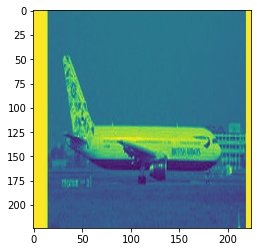

In [21]:
idx = 60
img_test = test_data[idx][0]
plt.imshow(img_test)

In [22]:
img_test = img_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
pred = model.predict(img_test)
print('arma' if pred[0][0] > 0.5 else 'aviao')

arma


model = ResNet50(weights='imagenet')

img_path = r'C:\Users\hagos\treinamentoConjunto\arma\arma-arma (1).jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])